In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt


In [2]:
# Load the MNIST dataset
(mnist_x, mnist_y), _ = mnist.load_data()
mnist_x = mnist_x / 255.0  # Normalize pixel values to [0, 1]

11490434/11490434 [==============================] - 1s 0us/step


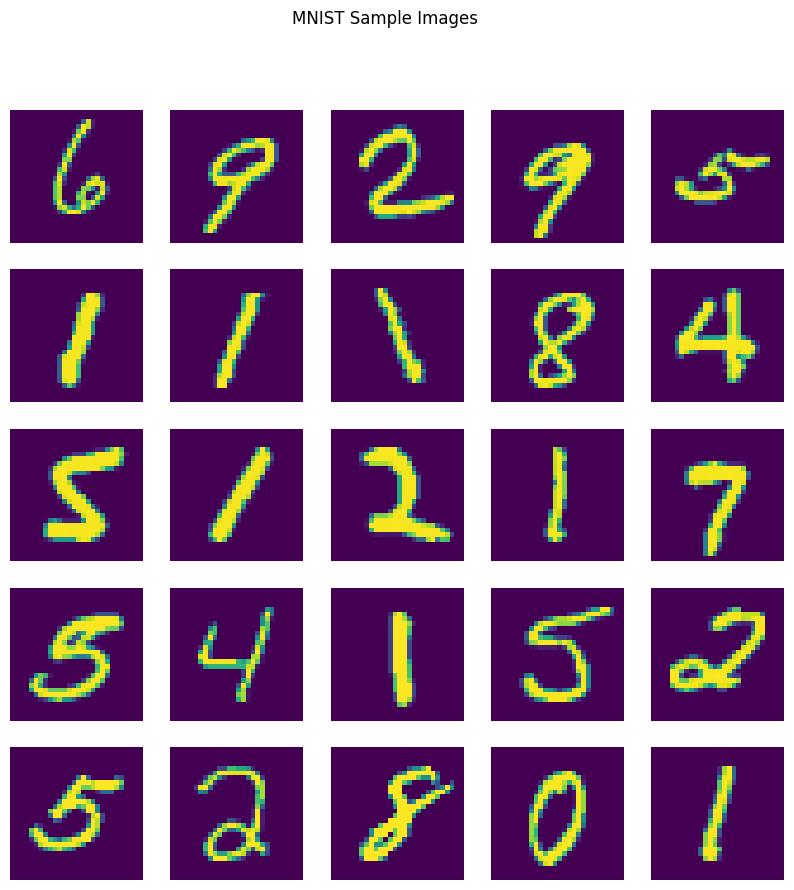

In [3]:
import numpy as np

# Function to display images in a 5x5 grid
def plot_images(dataset, dataset_name):
    fig, axes = plt.subplots(5, 5, figsize=(10, 10))
    fig.suptitle(f"{dataset_name} Sample Images")

    for i in range(5):
        for j in range(5):
            index = np.random.randint(0, len(dataset))
            ax = axes[i, j]
            ax.imshow(dataset[index])
            ax.axis('off')

    plt.show()

# Display MNIST images
plot_images(mnist_x, "MNIST")


In [5]:
# Split MNIST and CIFAR-10 datasets into training and testing sets
mnist_x_train, mnist_x_test, mnist_y_train, mnist_y_test = train_test_split(mnist_x, mnist_y, test_size=0.2, random_state=42)


In [6]:
mnist_y_train

array([5, 0, 1, ..., 0, 0, 4], dtype=uint8)

In [7]:
# One-hot encode the labels
mnist_y_train = to_categorical(mnist_y_train, num_classes=10)
mnist_y_test = to_categorical(mnist_y_test, num_classes=10)

In [8]:
mnist_y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
nn = Sequential()

In [14]:
nn.add(Flatten(input_shape=(28,28,1)))
nn.add(Dense(128, activation='relu'))
nn.add(Dense(64, activation='relu'))
nn.add(Dense(10, activation='softmax'))
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
nn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
history = nn.fit(mnist_x_train, mnist_y_train, validation_data=(mnist_x_test, mnist_y_test), epochs=10, batch_size=64)

Epoch 1/10
750/750 [==============================] - 9s 5ms/step - loss: 0.3110 - accuracy: 0.9098 - val_loss: 0.1549 - val_accuracy: 0.9552
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1296 - accuracy: 0.9618 - val_loss: 0.1237 - val_accuracy: 0.9625
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0888 - accuracy: 0.9737 - val_loss: 0.1097 - val_accuracy: 0.9659
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0666 - accuracy: 0.9794 - val_loss: 0.0862 - val_accuracy: 0.9753
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0519 - accuracy: 0.9839 - val_loss: 0.0948 - val_accuracy: 0.9734
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0394 - accuracy: 0.9878 - val_loss: 0.0843 - val_accuracy: 0.9744
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0351 - accuracy: 0.9889 - val_loss: 0.1093 - val_accuracy: 0.9696
Epoch 

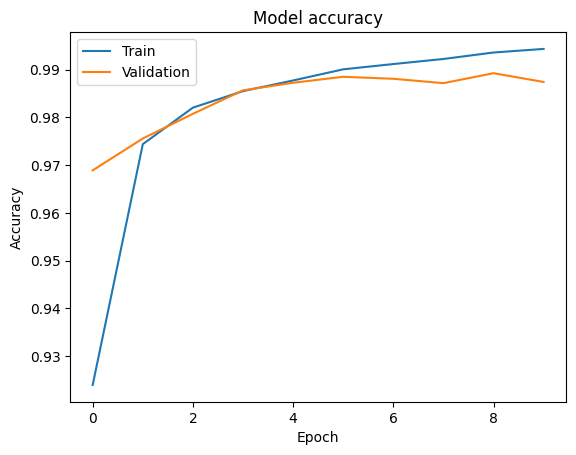

In [23]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [18]:
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt

def evaluate_model(model, x_test, y_test, dataset_name, architecture_name):
    y_pred = model.predict(x_test)
    y_pred = y_pred.argmax(axis=1)
    y_test = y_test.argmax(axis=1)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')

    print(f"Evaluation for {dataset_name} using {architecture_name}:\n")
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}\n")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
                xticklabels=[f"Class {i}" for i in range(cm.shape[0])],
                yticklabels=[f"Class {i}" for i in range(cm.shape[0])])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


375/375 [==============================] - 1s 3ms/step
Evaluation for MNIST using CNN:

Accuracy: 0.9885833333333334
F1 Score: 0.988490863094713
Precision: 0.9884557633860798
Recall: 0.9885905866148497



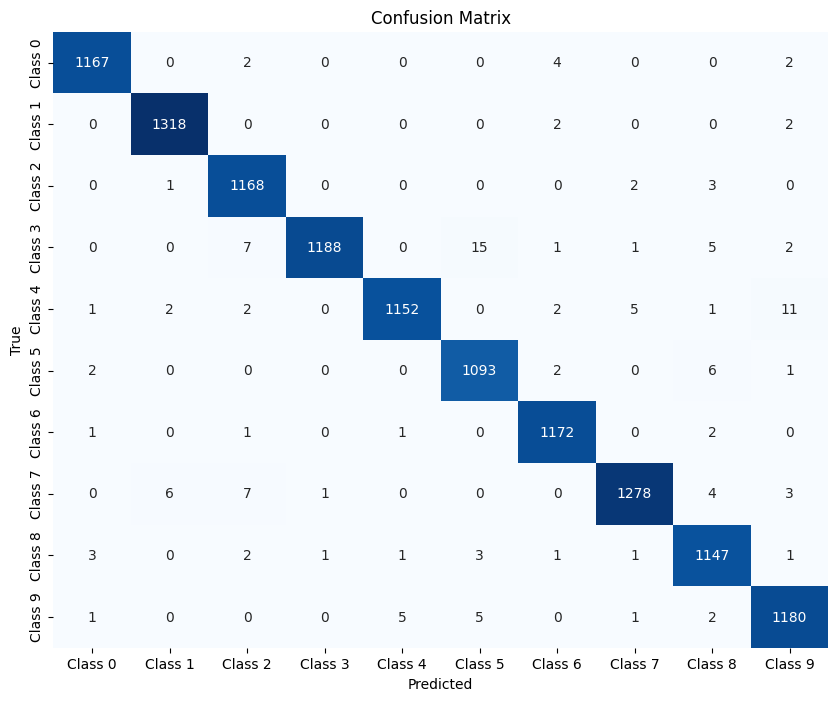

In [28]:
evaluate_model(model, mnist_x_test, mnist_y_test, "MNIST", "CNN")

In [25]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 400)               0         
                                                                 
 dense_14 (Dense)            (None, 256)              

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
history = model.fit(mnist_x_train, mnist_y_train, validation_data=(mnist_x_test, mnist_y_test), epochs=10, batch_size=64)

Epoch 1/10
750/750 [==============================] - 7s 6ms/step - loss: 0.2042 - accuracy: 0.9372 - val_loss: 0.0761 - val_accuracy: 0.9762
Epoch 2/10
750/750 [==============================] - 4s 6ms/step - loss: 0.0594 - accuracy: 0.9810 - val_loss: 0.0680 - val_accuracy: 0.9789
Epoch 3/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0386 - accuracy: 0.9881 - val_loss: 0.0439 - val_accuracy: 0.9867
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0295 - accuracy: 0.9907 - val_loss: 0.0378 - val_accuracy: 0.9885
Epoch 5/10
750/750 [==============================] - 5s 6ms/step - loss: 0.0222 - accuracy: 0.9930 - val_loss: 0.0470 - val_accuracy: 0.9850
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0199 - accuracy: 0.9937 - val_loss: 0.0432 - val_accuracy: 0.9883
Epoch 7/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0167 - accuracy: 0.9945 - val_loss: 0.0452 - val_accuracy: 0.9882
Epoch 